In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
import csvStructures as csvStruc
import matplotlib
import matplotlib.pyplot as plt
import sillyFunctions as ezFunc

electiondata = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/indianElections/Loksabha_1962-2019.csv",
        schema=csvStruc.electionsSchema)

+---------+
|namespace|
+---------+
|  default|
+---------+



In [2]:
electiondata.printSchema()

root
 |-- city: string (nullable = true)
 |-- no: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- state: string (nullable = true)
 |-- candidate: string (nullable = true)
 |-- party: string (nullable = true)
 |-- electors: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- turnout: string (nullable = true)
 |-- margin: string (nullable = true)
 |-- margin%: string (nullable = true)
 |-- year: integer (nullable = true)



In [3]:
pollutiondata = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/pollution/data.csv",
        schema=csvStruc.pollutionSchema)

In [4]:
pollutiondata.show(5)

+--------+------------------+--------------+---------+------+--------------------+----+----+----+----+---------------------------+-----+----------+
|stn_code|     sampling_date|         state| location|agency|                type| so2| no2|rspm| spm|location_monitoring_station|pm2_5|      date|
+--------+------------------+--------------+---------+------+--------------------+----+----+----+----+---------------------------+-----+----------+
|stn_code|     sampling_date|         state| location|agency|                type|null|null|null|null|       location_monitori...| null|      date|
|     150|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...| 4.8|17.4|null|null|                         NA| null|1990-02-01|
|     151|February - M021990|Andhra Pradesh|Hyderabad|    NA|     Industrial Area| 3.1| 7.0|null|null|                         NA| null|1990-02-01|
|     152|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...| 6.2|28.5|null|null|          

In [5]:
economic_info_data = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/socioEconomicData/india.csv",
        schema=csvStruc.economicInfoSchema)

In [6]:
economic_info_data.show(5)

+--------------------+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+-----------------+
|               state|1990|1991|1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014|  2015|  2016|  2017|  2018|  2019|  2020|  2021|  2022|         category|
+--------------------+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+-----------------+
|               state|1990|1991|1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014|  2015|  2016|  2017|  2018|  2019|  2020|  2021|  2022|         CATEGORY|
|Andaman & Nicobar...|25

In [7]:
population_data_2001 = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/populationCensusByYear/data_2001.csv",
        schema=csvStruc.populationSchema)

In [8]:
population_data_2001.show(5)

+-------------+----+----------------+----------------+---------------------+-----------------------+
|         city|year|total_households|total_population|total_male_population|total_female_population|
+-------------+----+----------------+----------------+---------------------+-----------------------+
|         NAME|null|            null|            null|                 null|                   null|
|  WEST BENGAL|2001|        15872083|        80176197|             41465985|               38710212|
|  UTTARANCHAL|2001|         1603242|         8489349|              4325924|                4163425|
|UTTAR PRADESH|2001|        25757640|       166197921|             87565369|               78632552|
|      TRIPURA|2001|          664334|         3199203|              1642225|                1556978|
+-------------+----+----------------+----------------+---------------------+-----------------------+
only showing top 5 rows



In [9]:
all_population_data = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/populationCensusByYear/all_years.csv",
        schema=csvStruc.populationSchema)

In [10]:
all_population_data.show(5)

+-------------+----+----------------+----------------+---------------------+-----------------------+
|         city|year|total_households|total_population|total_male_population|total_female_population|
+-------------+----+----------------+----------------+---------------------+-----------------------+
|         NAME|null|            null|            null|                 null|                   null|
|  WEST BENGAL|2001|        15872083|        80176197|             41465985|               38710212|
|  UTTARANCHAL|2001|         1603242|         8489349|              4325924|                4163425|
|UTTAR PRADESH|2001|        25757640|       166197921|             87565369|               78632552|
|      TRIPURA|2001|          664334|         3199203|              1642225|                1556978|
+-------------+----+----------------+----------------+---------------------+-----------------------+
only showing top 5 rows



In [11]:
pollutiondatadf = pollutiondata.toPandas()

<Axes: >

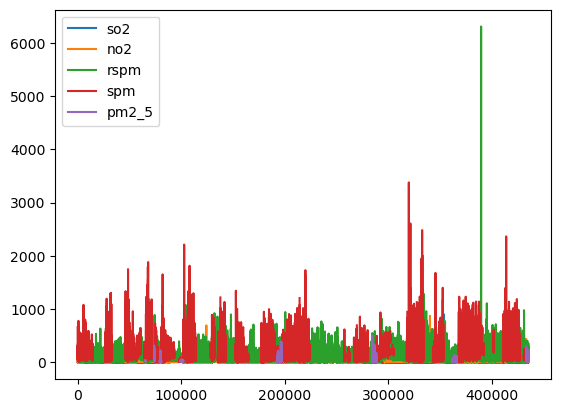

In [12]:
pollutiondatadf.plot()

In [13]:
test = ezFunc.extractint('bbbb33hh6h2h11')

In [14]:
print(test)

336211


In [15]:
pollutiondatadf["sampling_date"] = pollutiondatadf["sampling_date"].apply(ezFunc.extractint)

In [16]:
pollutiondatadf["sampling_date"] = pollutiondatadf["sampling_date"].apply(ezFunc.givethegoodyear)

In [30]:
grouped_by_year_state_type = pollutiondatadf.groupby(["sampling_date", "state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_32968\1345836536.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_year_state_type = pollutiondatadf.groupby(["sampling_date", "state"])["so2", "no2", "rspm"].aggregate('mean')


In [31]:
print(grouped_by_year_state_type)

                                   so2        no2  rspm
sampling_date state                                    
1987          Bihar          23.660000  29.463636   NaN
              Delhi          15.991303  18.700001   NaN
              Goa             4.318182   8.758823   NaN
              Gujarat        18.204477  27.465672   NaN
              Haryana        43.480000  18.577778   NaN
...                                ...        ...   ...
2088          Odisha               NaN        NaN   NaN
              Puducherry     13.400000  13.200000   NaN
              Punjab         17.400000  34.500000   NaN
              Rajasthan      33.200001  55.000000   NaN
              Uttar Pradesh  28.800001  23.900002   NaN

[827 rows x 3 columns]


In [32]:
grouped_by_yearonly = pollutiondatadf.groupby(["date", "state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_32968\1685270313.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_yearonly = pollutiondatadf.groupby(["date", "state"])["so2", "no2", "rspm"].aggregate('mean')


In [33]:
print((grouped_by_yearonly))

                                              so2        no2   rspm
date       state                                                   
1987-01-01 Gujarat                      19.699999  15.000000    NaN
           Rajasthan                          NaN        NaN    NaN
           Uttar Pradesh                16.100000        NaN    NaN
           West Bengal                  65.150002  86.366669    NaN
1987-01-02 Gujarat                      26.450001  45.400002    NaN
...                                           ...        ...    ...
NA         Maharashtra                  11.500000  33.000000   92.0
           Odisha                        9.000000  14.000000  105.0
           Tripura                            NaN        NaN    NaN
           andaman-and-nicobar-islands        NaN        NaN    NaN
date       state                              NaN        NaN    NaN

[84415 rows x 3 columns]


In [27]:
base_group_by = pollutiondatadf.groupby(["sampling_date", "state"])

In [34]:
grouped_by_state = pollutiondatadf.groupby(["state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_32968\591754673.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_state = pollutiondatadf.groupby(["state"])["so2", "no2", "rspm"].aggregate('mean')


In [37]:
print(grouped_by_state)

                                   so2        no2        rspm
state                                                        
Andhra Pradesh                7.284844  21.704451   78.182823
Arunachal Pradesh             3.179105   5.469697   76.629211
Assam                         6.723263  14.793691   93.724915
Bihar                        19.381475  36.575523  123.705177
Chandigarh                    2.676986  18.619404   96.587082
Chhattisgarh                 12.846609  24.815960  126.472397
Dadra & Nagar Haveli          8.939587  18.293959   76.536530
Daman & Diu                   8.192958  16.168926   73.749428
Delhi                         8.737273  53.489147  196.639771
Goa                           6.827913  12.506337   61.212765
Gujarat                      16.656343  24.065630   98.244507
Haryana                      14.064957  23.428310  149.860535
Himachal Pradesh              2.667013  13.658688   91.870201
Jammu & Kashmir               7.180521  12.213181  117.449486
Jharkhan

<Axes: xlabel='state'>

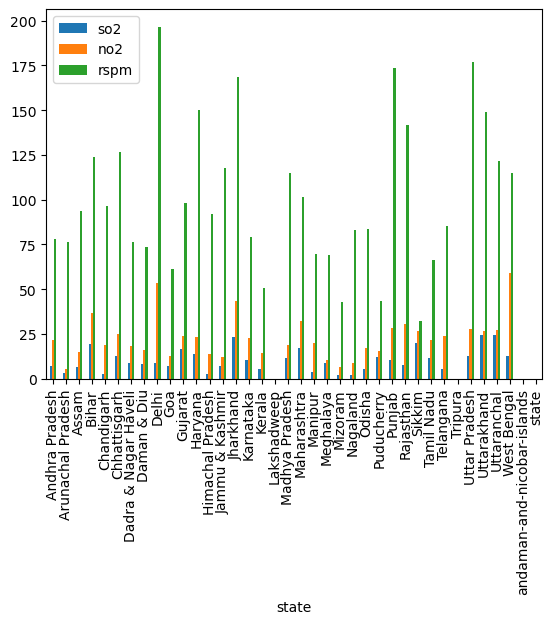

In [40]:
grouped_by_state.plot.bar()